>1. Generate 50 2D-data points. Add Gaussian random noise to the data. Show the original curve line and the noisy data.

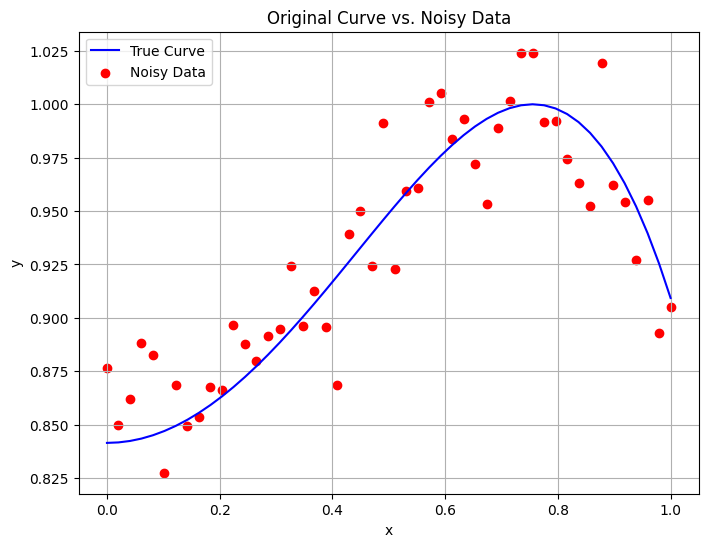

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg

# Define the true function y = sin(x^2 + 1)
def true_function(x):
    return np.sin(x**2 + 1)

# Generate 50 2D data points with Gaussian noise
np.random.seed(0)  # Set a seed for reproducibility
num_points = 50
x_start = 0
x_end = 1
x_data = np.linspace(x_start,x_end,num_points)
y_true = true_function(x_data)
sigma = 0.02
y_noisy = y_true + np.random.normal(0, sigma, num_points)

# Plot the original curve and the noisy data
plt.figure(figsize=(8, 6))
plt.plot(x_data, y_true, 'b-', label='True Curve')
plt.scatter(x_data, y_noisy, c='r', marker='o', label='Noisy Data')
plt.title('Original Curve vs. Noisy Data')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)

>2. Compute w based on the full Bayesian inference (by using basis functions like discussed in class). Display the estimated values of w.

In [2]:
# Define the polynomial basis function
def gaussian(x, mu, sigma):
    return np.exp(-0.5 * ((x - mu) / sigma) ** 2)

def basis_function_G(x,M,s):
    basis_functions = [gaussian(x, mu=np.linspace(x_start,x_end,M-1)[i],sigma=s) for i in range(M-1)]
    return basis_functions

def Full_Bayesian(x, y, M, s, alpha, beta):  # Full_Bayesian using basis function
    N = len(x)
    ff = np.ones([N, M])
        
    for i in range(N):
        ff[i][1:] = basis_function_G(x[i], M, s)
    
    identity = np.identity(M)
    ss = linalg.pinv(alpha*identity + beta * np.dot(ff.T, ff))
    w = beta * np.dot(np.dot(ss, ff.T), y)
    return w, ff, ss

w, ff, ss = Full_Bayesian(x_data, y_noisy, M=5, s=2, alpha=0.2, beta=1)
print(f'w:{w}')

w:[ 0.169802   -0.01101637  0.12931916  0.26828993  0.39455868]


>3. Experiment with your code by changing alpha and beta.
Discuss the meaning of them with respect to the curve fitting results.

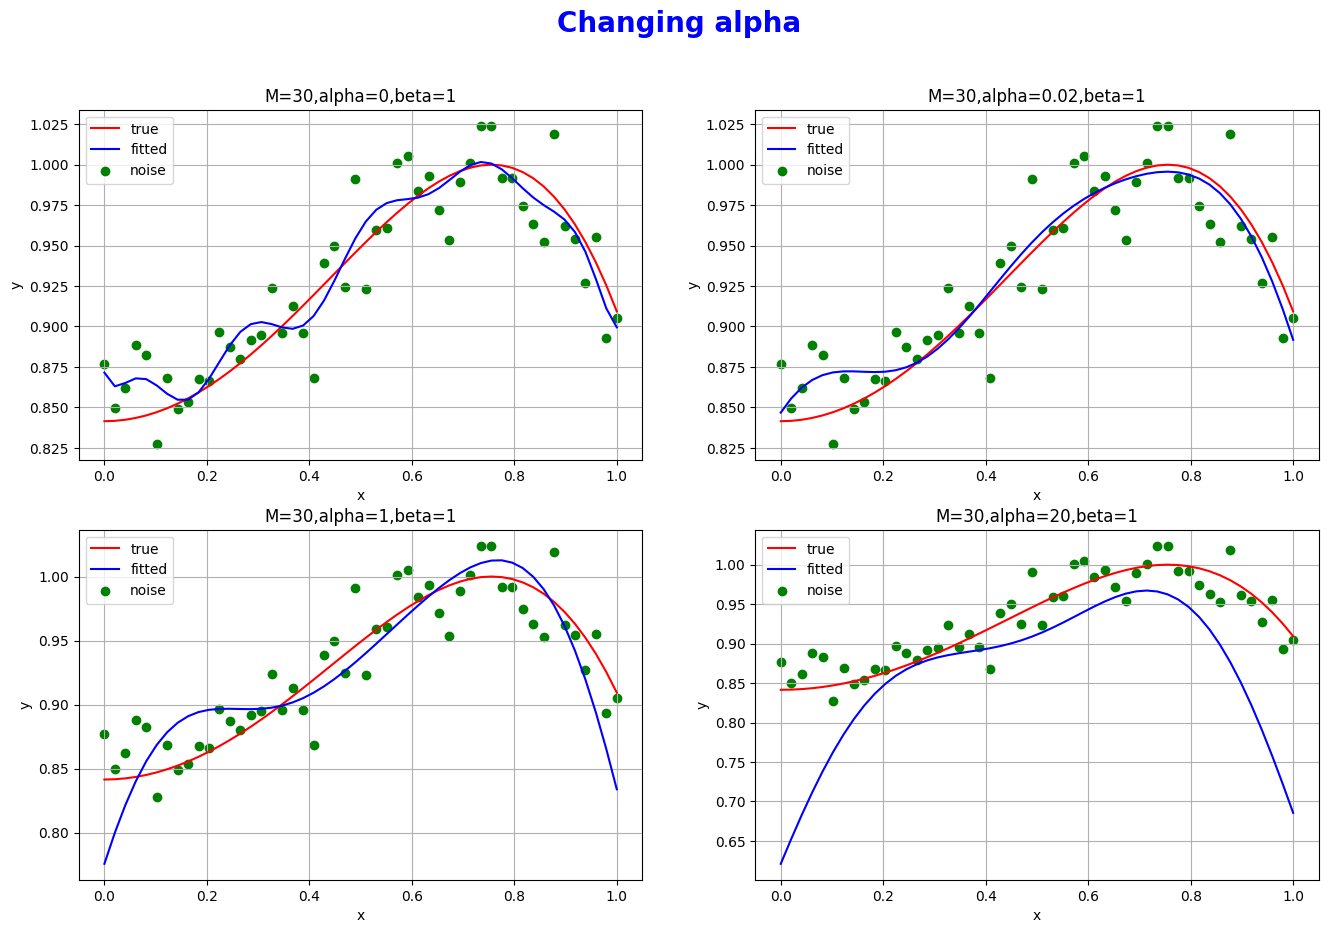

In [3]:
plt.figure(figsize=(16, 10))
M=30
beta = 1
alpha_ = [0,0.02,1,20]
for i, alpha in enumerate(alpha_):
    w, ff, ss = Full_Bayesian(x_data, y_noisy, M=M, s=0.2, alpha=alpha, beta=beta)
    y_fitted = ff.dot(w)
    plt.subplot(2,2,i+1)
    plt.plot(x_data, y_true, 'r-', label='true')
    plt.plot(x_data, y_fitted, 'b-', label = 'fitted')
    plt.scatter(x_data, y_noisy, c='g', marker='o', label='noise')
    plt.title(f'M={M},alpha={alpha},beta={beta}')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.grid(True)
plt.suptitle('Changing alpha', fontsize=20, fontweight='bold', color='blue')
plt.show()

- changing alpha

Increasing alpha can fix overfitting problem as shown in the first line graph.

But too large alpha will cause underfitting problem as shown in second line graph.

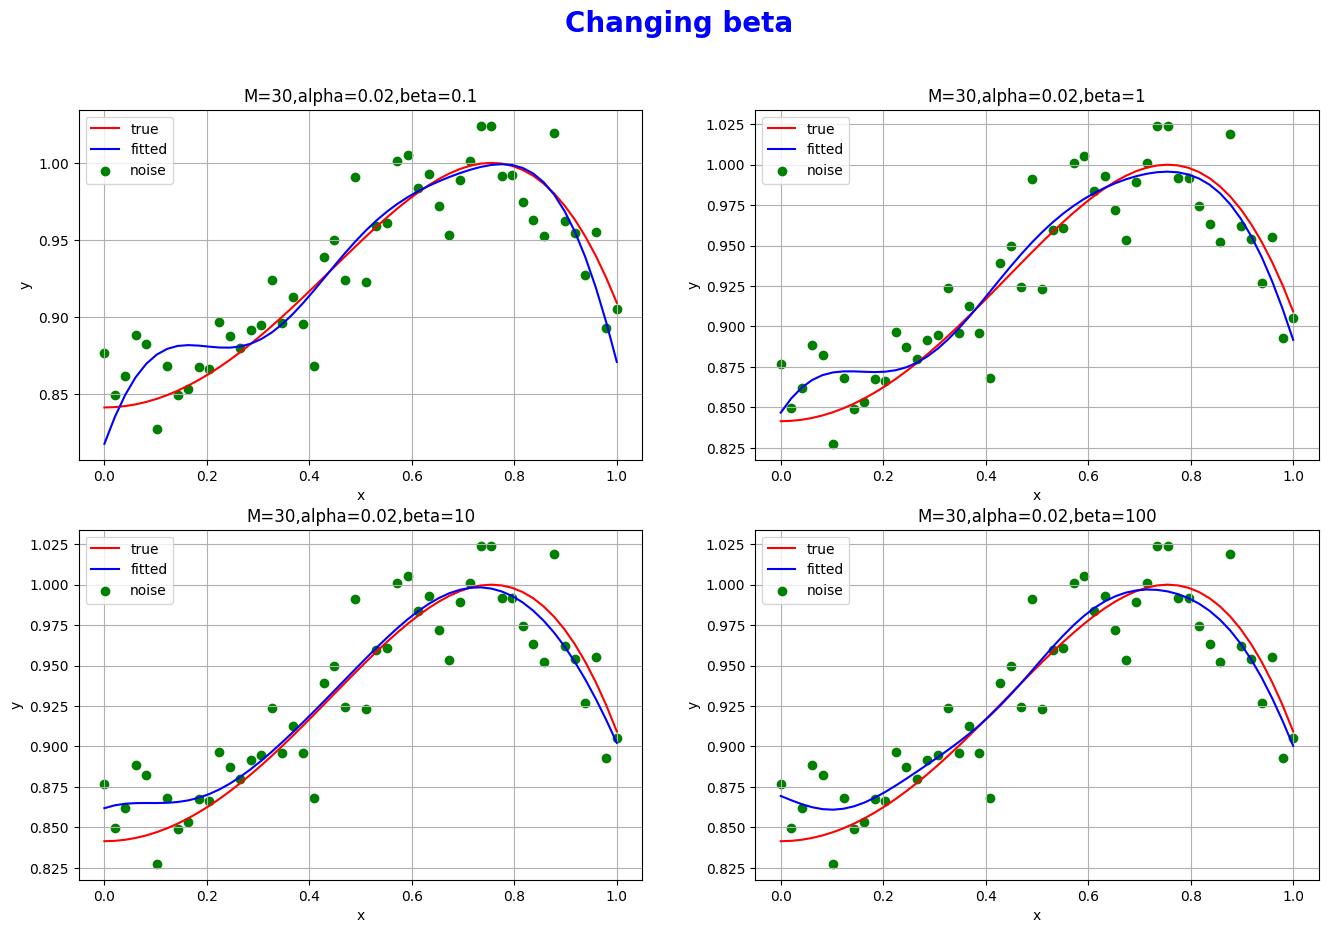

In [4]:
plt.figure(figsize=(16, 10))
M=30
beta_ = [0.1,1,10,100]
alpha = 0.02
for i, beta in enumerate(beta_):
    w, ff, ss = Full_Bayesian(x_data, y_noisy, M=M, s=0.2, alpha=alpha, beta=beta)
    y_fitted = ff.dot(w)
    plt.subplot(2,2,i+1)
    plt.plot(x_data, y_true, 'r-', label='true')
    plt.plot(x_data, y_fitted, 'b-', label = 'fitted')
    plt.scatter(x_data, y_noisy, c='g', marker='o', label='noise')
    plt.title(f'M={M},alpha={alpha},beta={beta}')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.grid(True)
plt.suptitle('Changing beta', fontsize=20, fontweight='bold', color='blue')
plt.show()

- changing beta

Increasing beta can fix underfitting problem as shown in the first line graph.

But too large beta will cause overfitting problem as shown in second line graph.

>4. Show your best fitting

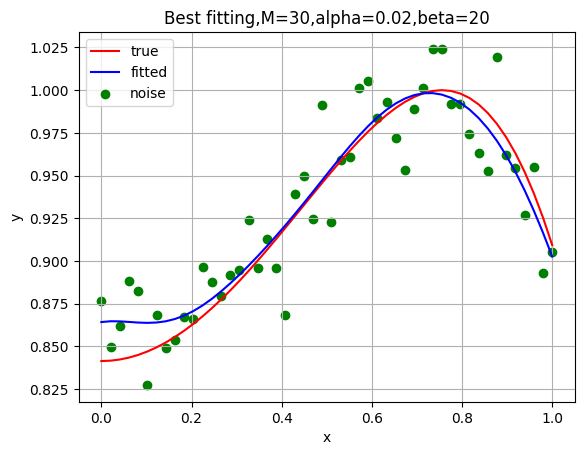

In [5]:
M = 30
alpha = 0.02
beta = 20

w, ff, ss = Full_Bayesian(x_data, y_noisy, M=M, s=0.2, alpha=alpha, beta=beta)
y_fitted = ff.dot(w)
plt.plot(x_data, y_true, 'r-', label='true')
plt.plot(x_data, y_fitted, 'b-', label = 'fitted')
plt.scatter(x_data, y_noisy, c='g', marker='o', label='noise')
plt.title(f'Best fitting,M={M},alpha={alpha},beta={beta}')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)

>5. Explain how useful p(w|t) for the training and testing stages.
### Ans:


- For training stages

p(w|t) is what we want to obtain and through finding the maxinmum of p(w|t), we compute w and then predict the curve.

- For testing stages

we use p(w|t) to compute p(tnew|t) and estimate how good the t_new is.

>6. Generate 50 2D-data points. Add Gaussian random noise to the data. Show the original curve line and the noisy data

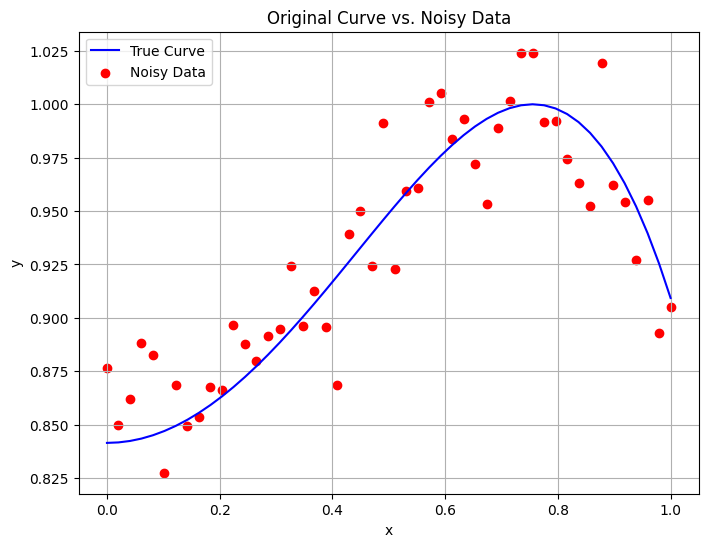

In [6]:
# Define the true function y = sin(x^2 + 1)
def true_function(x):
    return np.sin(x**2 + 1)

# Generate 50 2D data points with Gaussian noise
np.random.seed(0)  # Set a seed for reproducibility
num_points = 50
x_start = 0
x_end = 1
x_data = np.linspace(x_start,x_end,num_points)
N = len(x_data)
y_true = true_function(x_data)
sigma = 0.02
y_noisy = y_true + np.random.normal(0, sigma, num_points)

# Plot the original curve and the noisy data
plt.figure(figsize=(8, 6))
plt.plot(x_data, y_true, 'b-', label='True Curve')
plt.scatter(x_data, y_noisy, c='r', marker='o', label='Noisy Data')
plt.title('Original Curve vs. Noisy Data')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)

>7. Compute the predictive distribution of every input data sequentially, where each input data is taken randomly from the noise data. Show your best prediction results for all 50 data one by
one

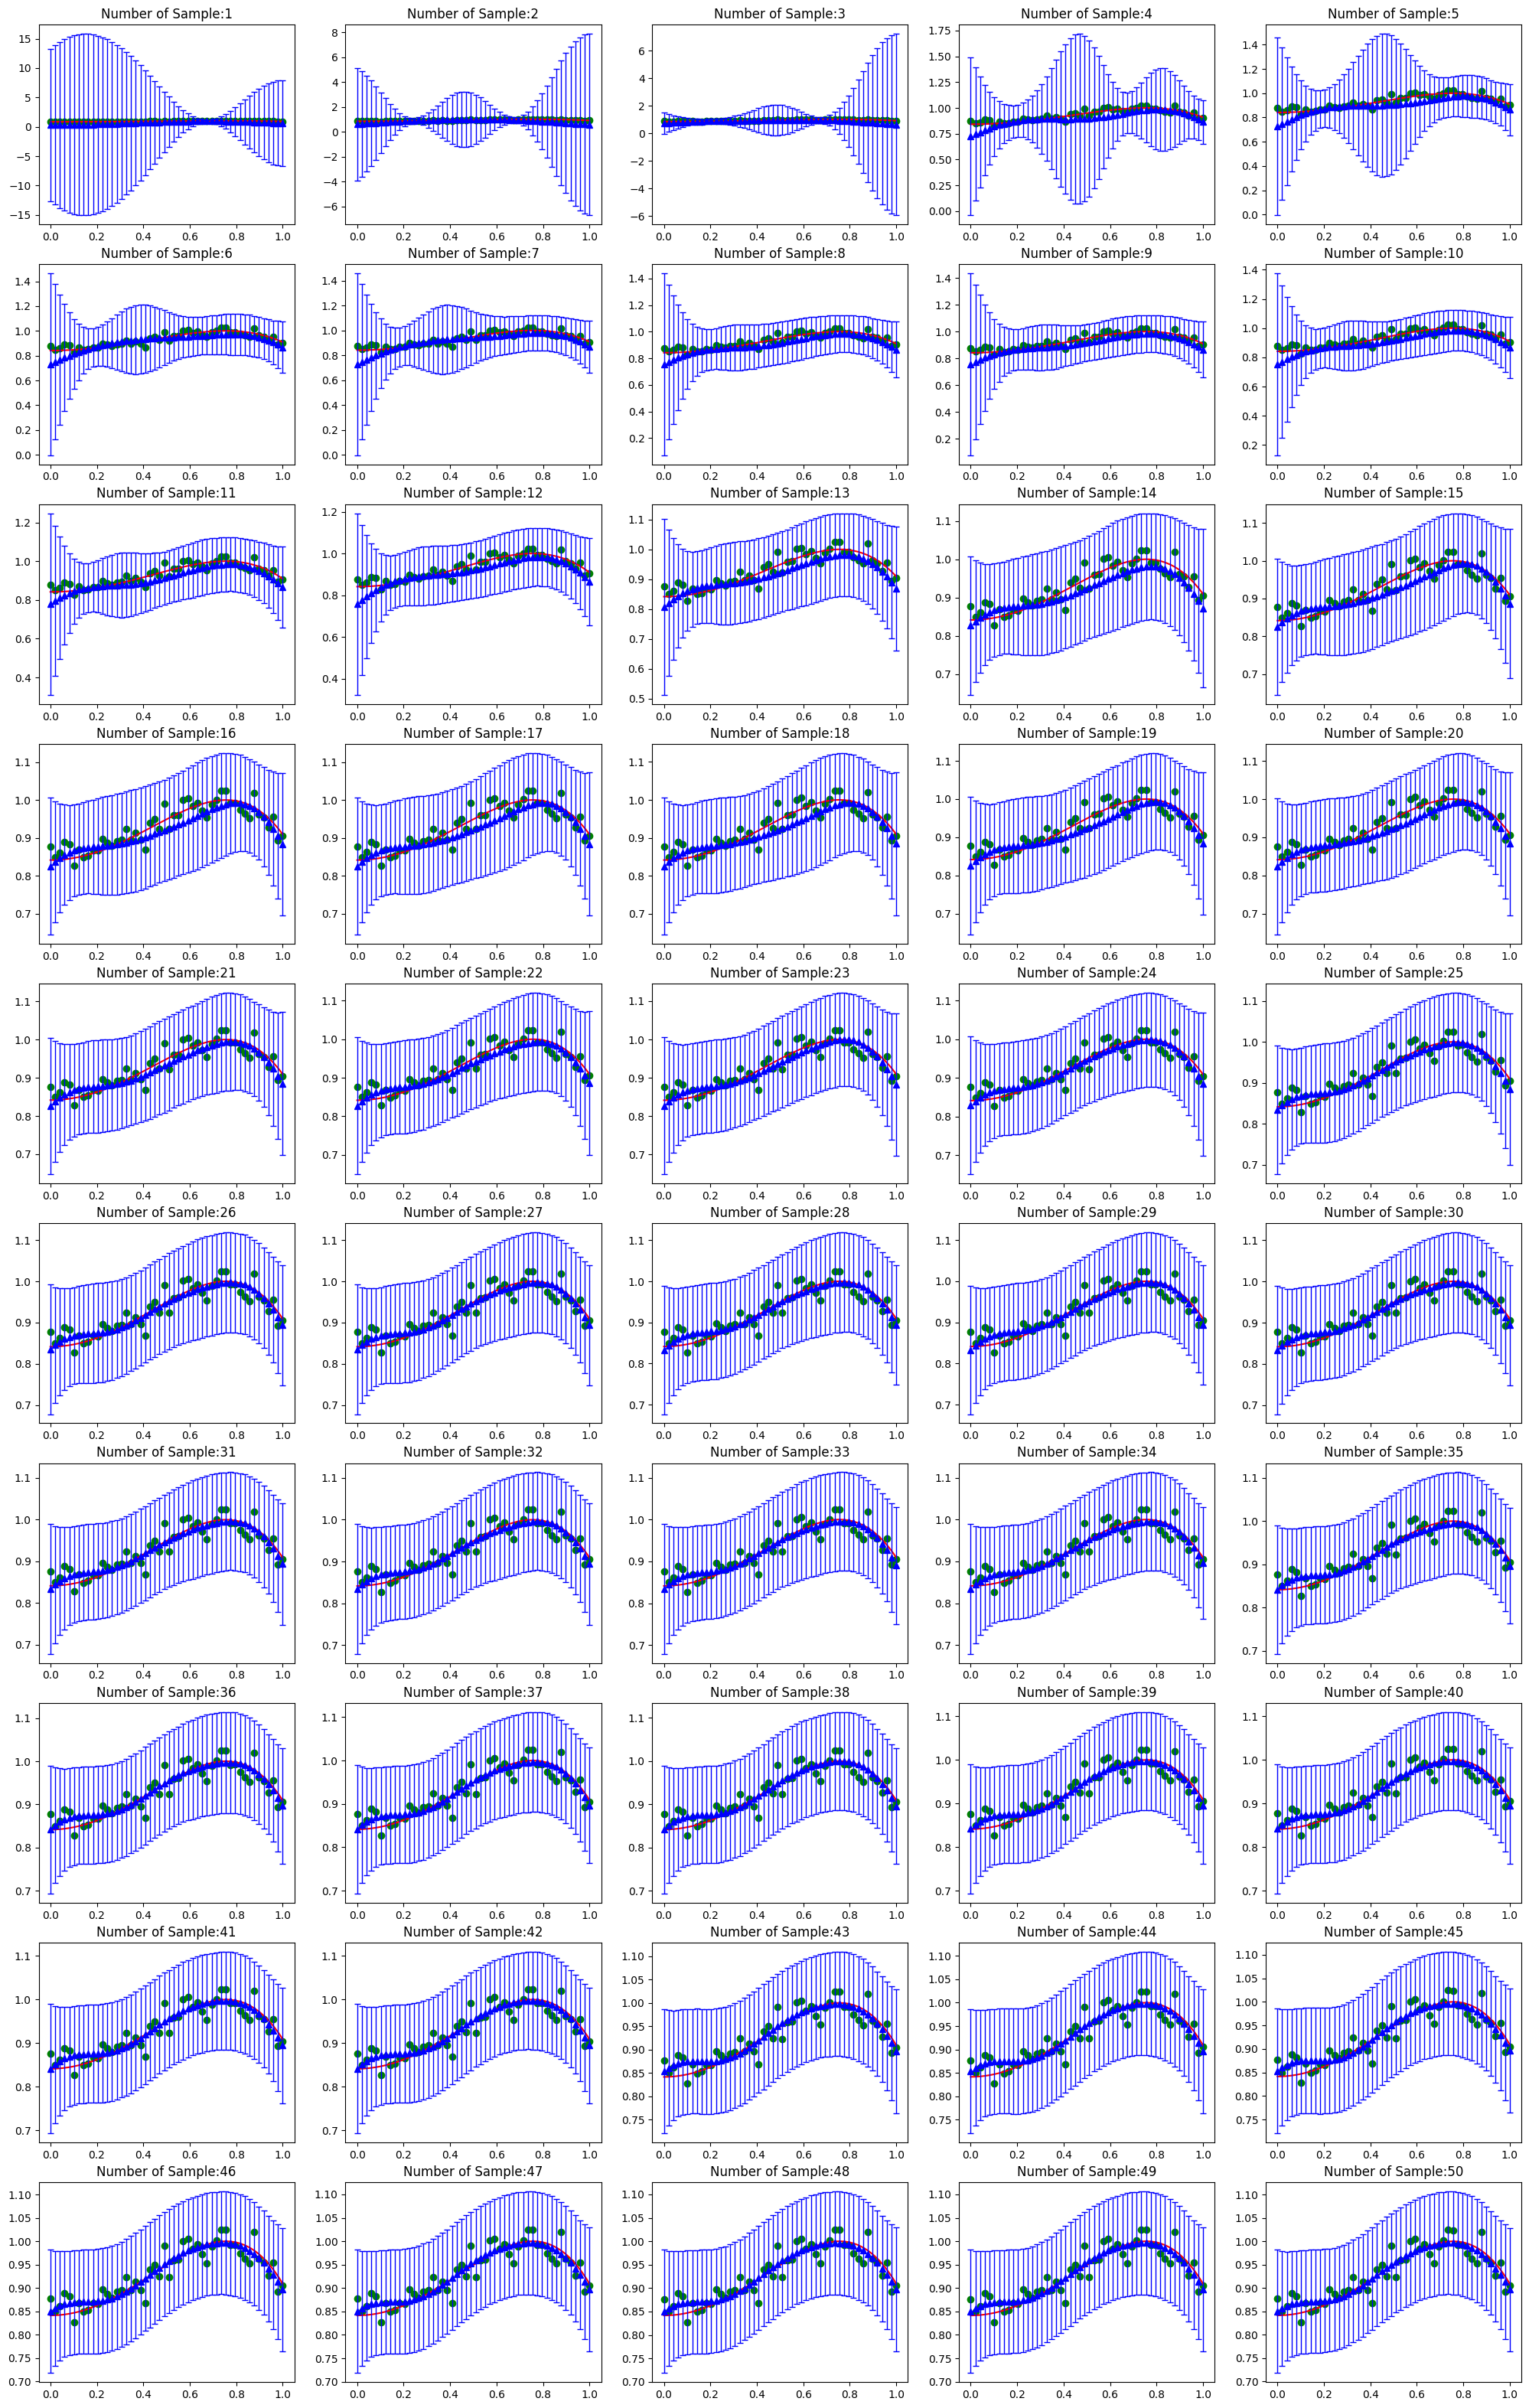

In [7]:
def Compute_star(ff, mn, ss, beta):     
    m_star = np.zeros(num_points)
    s_star = np.zeros(num_points)
    for i in range(N):
        m_star[i] = np.dot(ff[i], mn)
        s_star[i] = 1/beta + np.dot(np.dot(ff[i],ss),ff[i].T)
    return s_star, m_star 

M=10
alpha = 0.2
beta = 10

x_index = np.random.permutation(num_points)
x_select = []
y_select = []
identity = np.identity(num_points)

plt.figure(figsize=(25, 40))
for i in range(num_points):
    x_select.append(x_data[x_index[i]])
    y_select.append(y_noisy[x_index[i]])
    m_n_select, _, ss_select = Full_Bayesian(x_select, y_select, M=M, s=0.2, alpha=alpha, beta=beta)
    _, ff, _ = Full_Bayesian(x_data, y_noisy, M=M, s=0.2, alpha=alpha, beta=beta)
    s_star, m_star = Compute_star(ff, m_n_select, ss_select, beta)
    plt.subplot(10,5,i+1)
    plt.title(f'Number of Sample:{len(x_select)}')
    plt.plot(x_data,y_true,'red')
    plt.scatter(x_data,y_noisy, c='g', marker='o')
    plt.errorbar(x_data, m_star, yerr = s_star, fmt='b^', ecolor = 'blue',elinewidth=1, capsize = 3)


>8. Explain why the predictive distribution is better than the original form of the full Bayesian inference.

### Ans:

The predictive distribution is designed for making predictions on new, unseen data points. It generalizes well to different situations and allows you to assess how well your model can extrapolate beyond the observed data.

>9. Discuss the differences between p(t_new|t) and p(w|t).

### Ans:

p(t_new|t) models the uncertainty in predicting new data points (t_new) given the observed data (t).

p(w|t) models the uncertainty in the model parameters (w) given the observed data (t).

p(t_new|t) deals with the prediction of new data points based on existing data, while p(w|t) deals with the updating of our beliefs about model parameters based on observed data. 